# Setup

In [1]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
import bbknn
from pathlib import Path
sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

import muon as mu
from muon import prot as pt

%matplotlib inline
import panel as pn
#pn.extension(sizing_mode="stretch_width", comms='colab')
pn.extension( comms='colab')


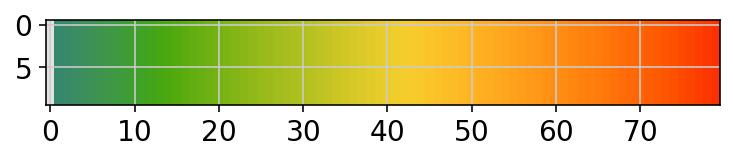

In [2]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [3]:
# add extra code to the path
import sys
sys.path.append('/content/sctoolkit/sctoolkit/')
from proportions import *

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.


In [4]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,pysam

Last updated: 2022-06-28T23:40:34.092140+00:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.13.0-1031-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.0.1

numpy  : 1.21.5
scipy  : 1.7.3
sklearn: 0.0
anndata: 0.7.8
scanpy : 1.9.1
muon   : 0.1.2
pysam  : 0.19.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.13.0-1031-aws
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

scipy     : 1.7.3
matplotlib: 3.5.1
panel     : 0.13.1
colorcet  : 3.0.0
pandas    : 1.2.5
seaborn   : 0.11.2
bbknn     : 1.5.1
anndata2ri: 1.0.6
re        : 2.2.1
logging   : 0.5.1.2
scanpy    : 1.9.1
numpy     : 1.21.5
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
muon      : 0.1.2



# Setup WD

In [5]:
#Change XXX to sample name
#folder='/content/'
samplename='PBMC_granulocyte_sorted'
random_state=42

import os

if not os.path.exists('./figures/'):
    os.makedirs('./figures/')

# import data as H5AD

In [7]:
mdata = mu.read("pbmc10k.h5mu")
mdata

MuData object with n_obs × n_vars = 11435 × 130397
  obs:	'sample', 'group'
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'highly_variable'
  2 modalities
    rna:	9738 x 22020
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'doublet_score', 'predicted_doublet', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
      uns:	'annotated_colors', 'group_colors', 'hvg', 'leiden', 'leiden_r0.2_colors', 'leiden_r0.3_colors', 'leiden_r0.4_colors', 'leiden_r0.5_colors', 'leiden_r0.5_sizes', 'leiden_r0.8_colors', 'leiden_r1.5_colors', 'neighbors', 'paga', 'pca', 'pearson_residuals_normalization', 'rank_genes_groups', 'scrublet', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'logcounts', 'normalized', 'raw', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    atac:	10458 x 108377
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'celltype_colors', 'files', 'group_colors', 'hvg', 'leiden', 'lsi', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [8]:
mu.pp.intersect_obs(mdata)

In [9]:
mdata.shape

(8761, 130397)

# Compare cell type annotation

In [10]:
from sklearn.metrics import adjusted_rand_score as ari
ari(mdata.obs['rna:annotated'], mdata.obs['atac:celltype'])

0.6434686003151809

In [11]:
# Calculate total number of cells of respective ATAC celltypes
df_total = (
    mdata.obs.groupby("atac:celltype").
        size().
        reset_index(name="n_total").
        set_index("atac:celltype")
)

# Calculate number of cells for each pair of RNA-ATAC celltype annotation
df = (
    mdata.obs.groupby(["atac:celltype", "rna:annotated"]).
        size().
        reset_index(name="n").
        set_index("atac:celltype").
        join(df_total).
        reset_index()
)

# Calculate a fraction of cells of each RNA celltype (n)
# for each ATAC celltype (/ n_total)
df_frac = df.assign(frac = lambda x: x.n / x.n_total)

In [12]:
df_wide = df_frac.set_index("atac:celltype").pivot(columns="rna:annotated", values="frac")

<AxesSubplot:xlabel='rna:annotated', ylabel='atac:celltype'>

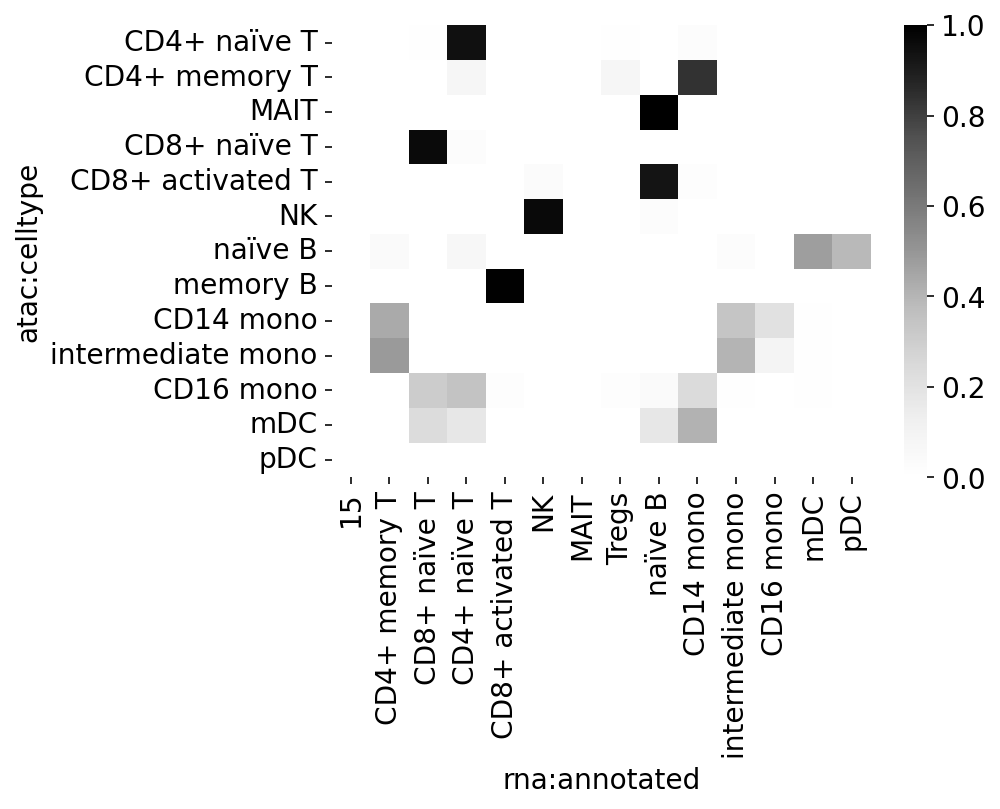

In [13]:

sb.heatmap(df_wide, cmap="Greys")

# Perform integration

In [14]:
if not os.path.exists('./models/'):
    os.makedirs('./models/')
mu.tl.mofa(mdata, outfile="models/pbmc10k_rna_atac.hdf5")


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='group1' with N=8761 samples and D=3000 features...
Loaded view='atac' group='group1' with N=8761 samples and D=19478 features...


Model options:
- Automatic Relevance Determination prior on the factors: True
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: 

In [15]:
# # NOTE: if you wish to load the trained model,
# #       use mofax library to quickly add
# #       factors and weights matrices
# #       to the mdata object
# #
# import mofax as mfx
# model = mfx.mofa_model('models/pbmc10k_rna_atac.hdf5')
# mdata.obsm["X_mofa"] = model.get_factors()

# # If only highly variable features were used
# w = model.get_weights()
# # Set the weights of features that were not used to zero
# mdata.varm["LFs"] = np.zeros(shape=(mdata.n_vars, w.shape[1]))
# mdata.varm["LFs"][mdata.var["highly_variable"]] = w

# model.close()

In [16]:
mdata

MuData object with n_obs × n_vars = 8761 × 130397
  obs:	'sample', 'group'
  var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'highly_variable'
  obsm:	'X_mofa'
  varm:	'LFs'
  2 modalities
    rna:	8761 x 22020
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'doublet_score', 'predicted_doublet', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden_r1.5', 'leiden_r1', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'annotated'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
      uns:	'annotated_colors', 'group_colors', 'hvg', 'leiden', 'leiden_r0.2_colors', 'leiden_r0.3_colors', 'leiden_r0.4_colors', 'leiden_r0.5_colors', 'leiden_r0.5_sizes', 'leiden_r0.8_colors', 'leiden_r1.5_colors', 'neighbors', 'paga', 'pca', 'pearson_residuals_normalization', 'rank_genes_groups', 'scrublet', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'logcounts', 'normalized', 'raw', 'sqrt_norm'
      obsp:	'connectivities', 'distances'
    atac:	8761 x 108377
      obs:	'sample', 'group', 'n_counts', 'log_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'NS', 'nucleosome_signal', 'tss_score', 'leiden', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
      uns:	'atac', 'celltype_colors', 'files', 'group_colors', 'hvg', 'leiden', 'lsi', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
      obsm:	'X_lsi', 'X_pca', 'X_umap'
      varm:	'LSI', 'PCs'
      layers:	'counts'
      obsp:	'connectivities', 'distances'

In [17]:
mdata.obsm['X_mofa'].shape

(8761, 10)

In [18]:
# Copy colours that were defined previously
mdata.uns = mdata.uns or dict()
mdata.uns['rna:annotated_colors'] = mdata['rna'].uns['annotated_colors']
mdata.uns['atac:celltype_colors'] = mdata['atac'].uns['celltype_colors']

... storing 'rna:sample' as categorical
... storing 'rna:group' as categorical
... storing 'rna:QC' as categorical
... storing 'rna:phase' as categorical
... storing 'rna:leiden_r1.5' as categorical
... storing 'rna:leiden_r1' as categorical
... storing 'rna:leiden_r0.8' as categorical
... storing 'rna:leiden_r0.5' as categorical
... storing 'rna:leiden_r0.4' as categorical
... storing 'rna:leiden_r0.3' as categorical
... storing 'rna:leiden_r0.2' as categorical
... storing 'rna:annotated' as categorical
... storing 'atac:sample' as categorical
... storing 'atac:group' as categorical
... storing 'atac:leiden' as categorical
... storing 'atac:celltype' as categorical
... storing 'sample' as categorical
... storing 'group' as categorical


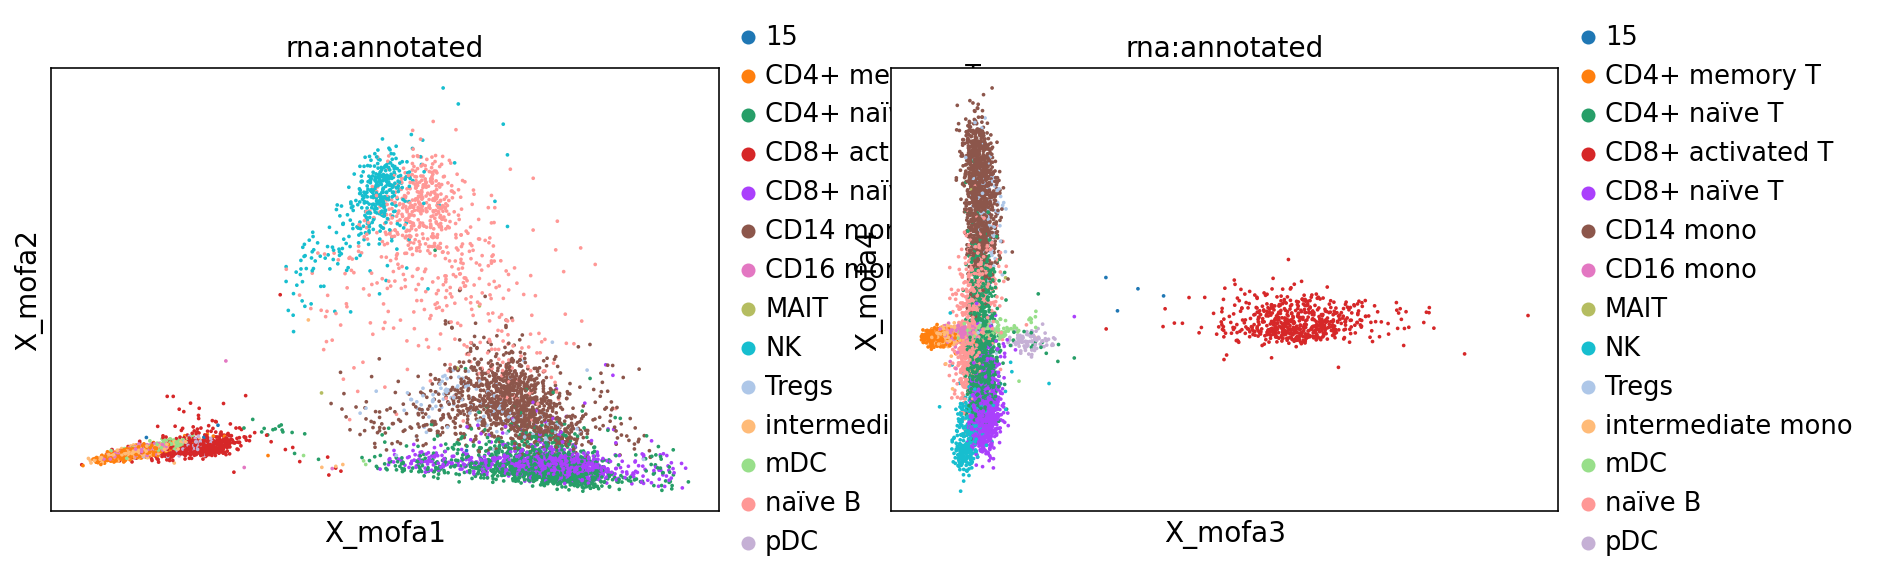

In [19]:
mu.pl.mofa(mdata, color="rna:annotated", components=["1,2", "3,4"])
# 'rna:celltype' is a column in mdata.obs
# derived from the 'celltype' column of mdata['rna'].obs

... storing 'rna:sample' as categorical
... storing 'rna:group' as categorical
... storing 'rna:QC' as categorical
... storing 'rna:phase' as categorical
... storing 'rna:leiden_r1.5' as categorical
... storing 'rna:leiden_r1' as categorical
... storing 'rna:leiden_r0.8' as categorical
... storing 'rna:leiden_r0.5' as categorical
... storing 'rna:leiden_r0.4' as categorical
... storing 'rna:leiden_r0.3' as categorical
... storing 'rna:leiden_r0.2' as categorical
... storing 'rna:annotated' as categorical
... storing 'atac:sample' as categorical
... storing 'atac:group' as categorical
... storing 'atac:leiden' as categorical
... storing 'atac:celltype' as categorical
... storing 'sample' as categorical
... storing 'group' as categorical


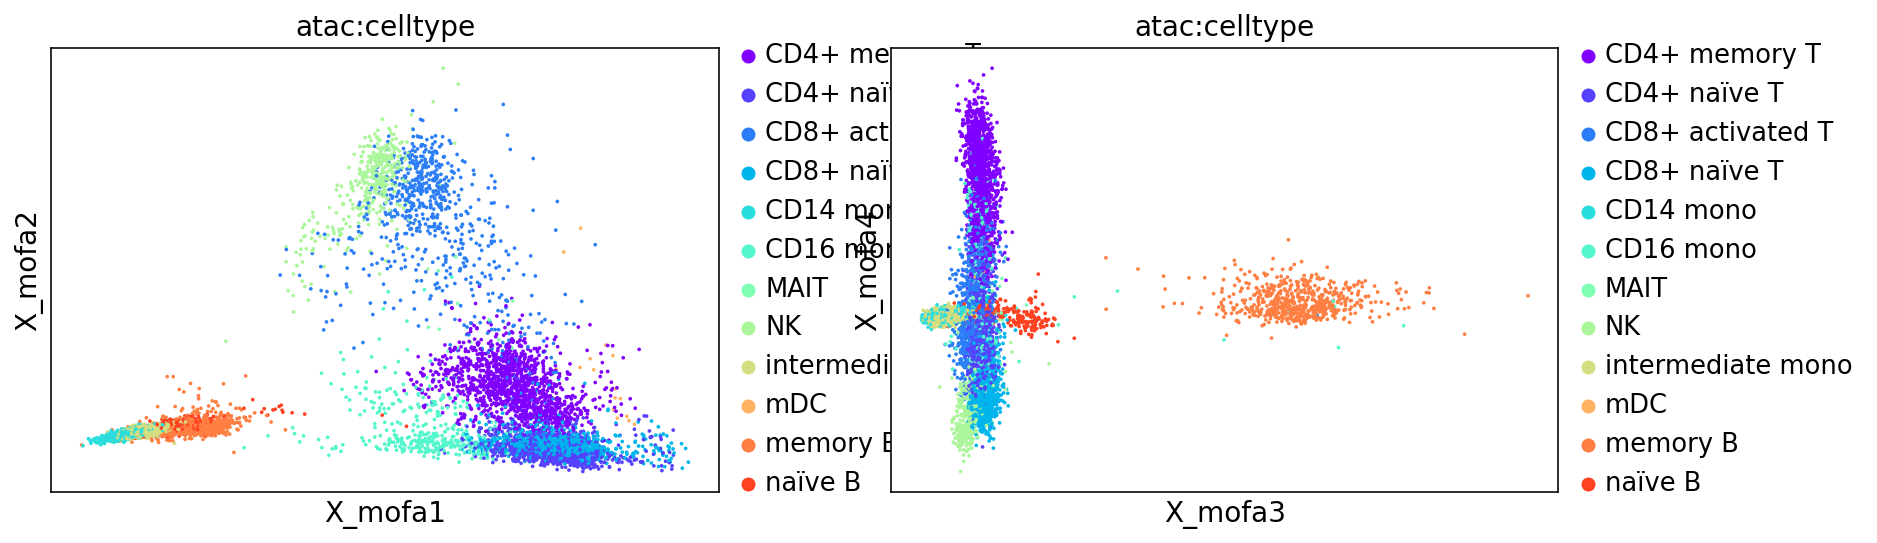

In [20]:
mu.pl.mofa(mdata, color="atac:celltype", components=["1,2", "3,4"])
# 'atac:celltype' is a column in mdata.obs
# derived from the 'celltype' column of mdata['atac'].obs

In [21]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata)

In [22]:
sc.tl.umap(mdata, min_dist=.2, spread=1., random_state=10)

... storing 'rna:sample' as categorical
... storing 'rna:group' as categorical
... storing 'rna:QC' as categorical
... storing 'rna:phase' as categorical
... storing 'rna:leiden_r1.5' as categorical
... storing 'rna:leiden_r1' as categorical
... storing 'rna:leiden_r0.8' as categorical
... storing 'rna:leiden_r0.5' as categorical
... storing 'rna:leiden_r0.4' as categorical
... storing 'rna:leiden_r0.3' as categorical
... storing 'rna:leiden_r0.2' as categorical
... storing 'rna:annotated' as categorical
... storing 'atac:sample' as categorical
... storing 'atac:group' as categorical
... storing 'atac:leiden' as categorical
... storing 'atac:celltype' as categorical
... storing 'sample' as categorical
... storing 'group' as categorical
... storing 'feature_types' as categorical
... storing 'interval' as categorical


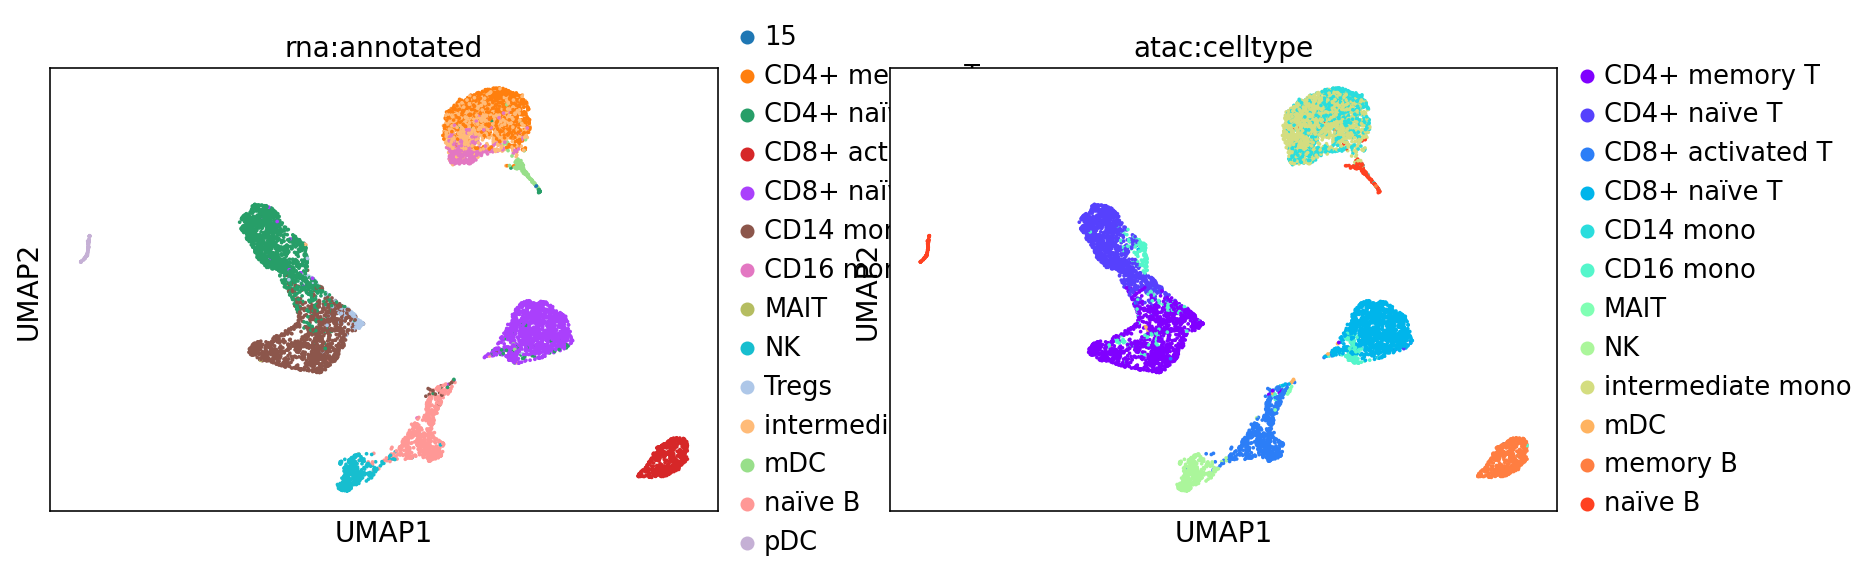

In [23]:
sc.pl.umap(mdata, color=["rna:annotated", "atac:celltype"])

In [24]:
sc.tl.leiden(mdata, key_added='leiden_joint')

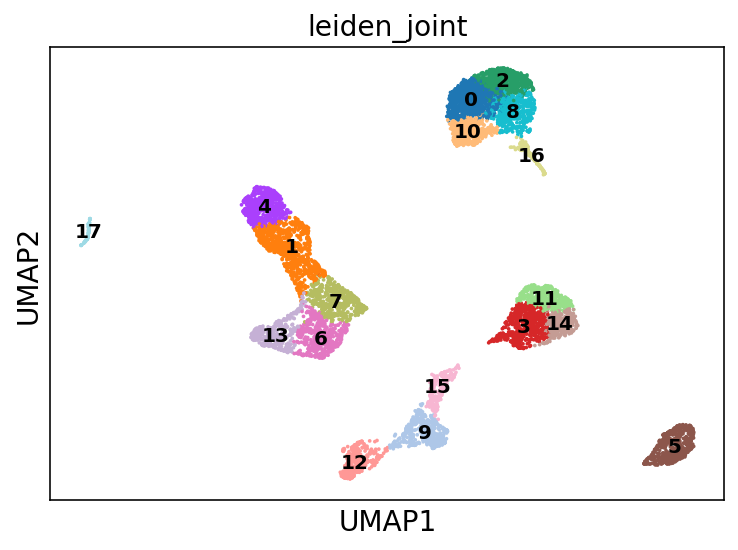

In [25]:
sc.pl.umap(mdata, color="leiden_joint", legend_loc='on data')

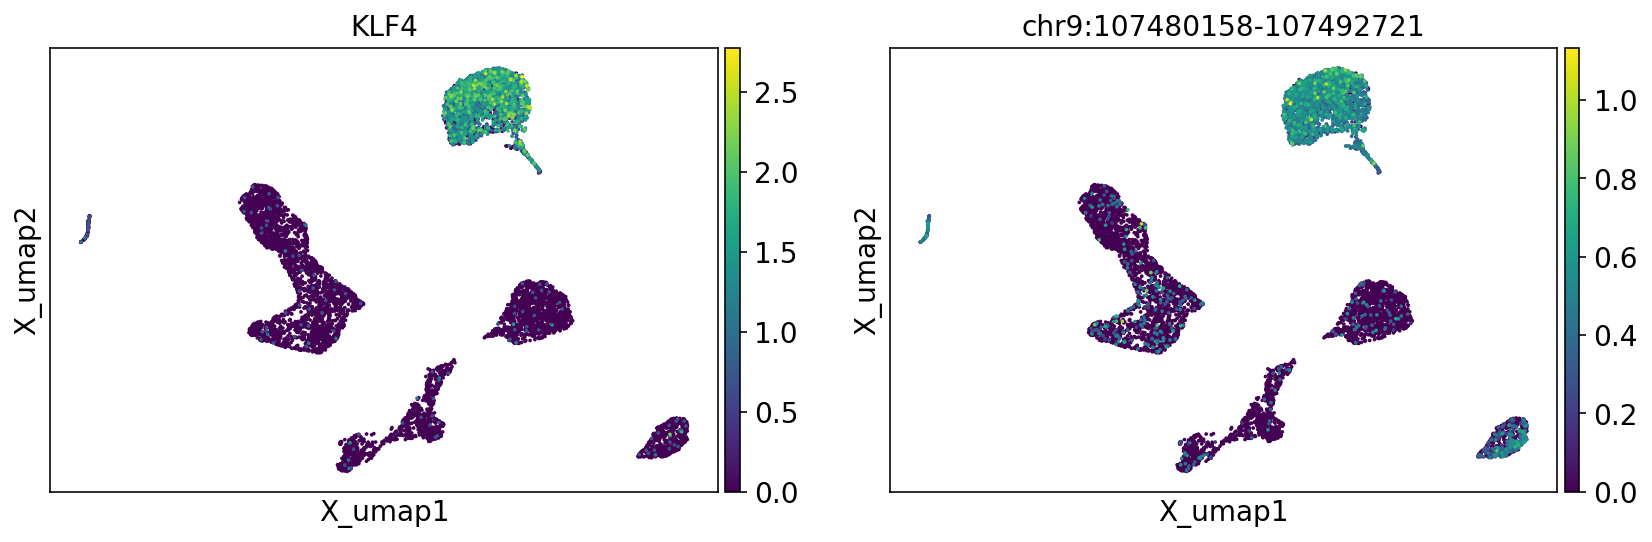

In [26]:
mu.pl.umap(mdata, color=["KLF4", "chr9:107480158-107492721"])

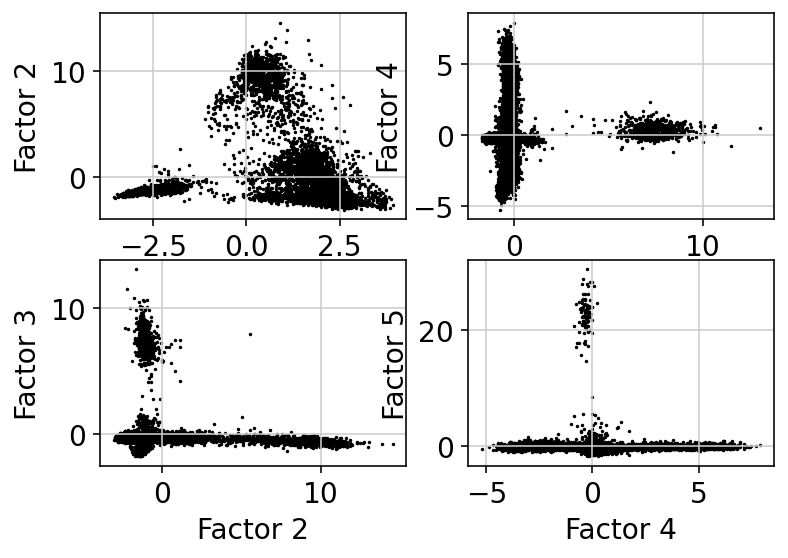

In [27]:
df = pd.DataFrame(mdata.obsm["X_mofa"])
df.columns = [f"Factor {i+1}" for i in range(df.shape[1])]

plot_scatter = lambda i, ax: sb.scatterplot(data=df, x=f"Factor {i+1}", y=f"Factor {i+2}", color="black", linewidth=0, s=3, ax=ax)

fig, axes = pl.subplots(2, 2)
for i in range(4):
    plot_scatter(i, axes[i%2][i//2])

# Annotate cell types

In [28]:
mdata['rna'].obs['leiden_joint'] = mdata.obs.leiden_joint
mdata['atac'].obs['leiden_joint'] = mdata.obs.leiden_joint

#Ranking genes and peaks

In [29]:
sc.tl.rank_genes_groups(mdata['rna'], 'leiden_joint', method='t-test_overestim_var')

In [30]:
from muon import atac as ac
ac.tl.rank_peaks_groups(mdata['atac'], 'leiden_joint', method='t-test_overestim_var')

#Listing differentially expressed genes and differentially accessible peaks¶

In [31]:
result = {}
result['rna'] = mdata['rna'].uns['rank_genes_groups']
result['rna']['genes'] = result['rna']['names']
result['atac'] = mdata['atac'].uns['rank_genes_groups']

groups = result['rna']['names'].dtype.names
pd.set_option("max_columns", 200)
pd.DataFrame(
    {mod + ':' + group + '_' + key[:1]: result[mod][key][group][:10]
    for group in groups for key in ['names', 'genes', 'pvals']
    for mod in mdata.mod.keys()})

,rna:0_n,atac:0_n,rna:0_g,atac:0_g,rna:0_p,atac:0_p,rna:1_n,atac:1_n,rna:1_g,atac:1_g,rna:1_p,atac:1_p,rna:2_n,atac:2_n,rna:2_g,atac:2_g,rna:2_p,atac:2_p,rna:3_n,atac:3_n,rna:3_g,atac:3_g,rna:3_p,atac:3_p,rna:4_n,atac:4_n,rna:4_g,atac:4_g,rna:4_p,atac:4_p,rna:5_n,atac:5_n,rna:5_g,atac:5_g,rna:5_p,atac:5_p,rna:6_n,atac:6_n,rna:6_g,atac:6_g,rna:6_p,atac:6_p,rna:7_n,atac:7_n,rna:7_g,atac:7_g,rna:7_p,atac:7_p,rna:8_n,atac:8_n,rna:8_g,atac:8_g,rna:8_p,atac:8_p,rna:9_n,atac:9_n,rna:9_g,atac:9_g,rna:9_p,atac:9_p,rna:10_n,atac:10_n,rna:10_g,atac:10_g,rna:10_p,atac:10_p,rna:11_n,atac:11_n,rna:11_g,atac:11_g,rna:11_p,atac:11_p,rna:12_n,atac:12_n,rna:12_g,atac:12_g,rna:12_p,atac:12_p,rna:13_n,atac:13_n,rna:13_g,atac:13_g,rna:13_p,atac:13_p,rna:14_n,atac:14_n,rna:14_g,atac:14_g,rna:14_p,atac:14_p,rna:15_n,atac:15_n,rna:15_g,atac:15_g,rna:15_p,atac:15_p,rna:16_n,atac:16_n,rna:16_g,atac:16_g,rna:16_p,atac:16_p,rna:17_n,atac:17_n,rna:17_g,atac:17_g,rna:17_p,atac:17_p
0,PLXDC2,chr9:107480158-107492721,PLXDC2,KLF4,2.111900e-276,7.011635e-185,TSHZ2,chr14:99255246-99275454,TSHZ2,"BCL11B, AL109767.1",9.337711e-94,3.607421e-69,PLXDC2,chr9:107480158-107492721,PLXDC2,KLF4,2.320504e-266,9.421249e-109,LEF1,chr2:86783559-86792275,LEF1,CD8A,6.388436e-123,1.826735e-88,FHIT,chr14:99255246-99275454,FHIT,"BCL11B, AL109767.1",2.348854e-102,4.875764e-55,BANK1,chr2:231669797-231676530,BANK1,PTMA,0.000000e+00,7.674708e-179,INPP4B,chr5:756911-759750,INPP4B,"ZDHHC11B, AC026740.3",4.761161e-132,1.521969e-56,INPP4B,chr14:22536559-22563070,INPP4B,"TRAJ7, TRAJ6, TRAJ5, TRAJ4, TRAJ3, TRAJ2, TRAJ...",7.652606e-78,8.763867e-43,PLXDC2,chr9:107480158-107492721,PLXDC2,KLF4,4.664500e-165,7.343199e-75,CCL5,chr1:184386243-184389335,CCL5,"C1orf21, AL445228.2",4.790088e-282,7.718919e-98,TCF7L2,chr5:1476663-1483241,TCF7L2,"SLC6A3, LPCAT1",1.067503e-147,1.221851e-67,CD8B,chr2:86783559-86792275,CD8B,CD8A,1.807700e-100,1.122181e-87,GNLY,chr17:83076201-83103570,GNLY,"METRNL, AC130371.2",3.328481e-314,4.833389e-109,RORA,chr6:161076038-161077022,RORA,"MAP3K4, AL139393.3",2.308923e-101,1.578351e-46,LEF1,chr2:86783559-86792275,LEF1,CD8A,2.888949e-53,7.667245e-59,CCL5,chr2:86783559-86792275,CCL5,CD8A,3.190849e-69,1.126144e-35,HLA-DPB1,chr3:159762787-159765472,HLA-DPB1,"IQCJ-SCHIP1-AS1, IQCJ-SCHIP1",8.611273e-58,5.174943e-22,TCF4,chr7:98641522-98642532,TCF4,NPTX2,1.975441e-107,3.735624e-29
1,NEAT1,chr20:50269694-50277398,NEAT1,SMIM25,1.368664e-240,6.014528e-148,ANK3,chr7:142782798-142813716,ANK3,"TRBC1, TRBJ2-1, TRBJ2-2, TRBJ2-2P, TRBJ2-3, TR...",1.924387e-90,4.783975e-53,VCAN,chr6:44057321-44060655,VCAN,"AL109615.2, AL109615.3",8.202983e-290,1.956976e-87,NELL2,chr12:10552886-10555668,NELL2,LINC02446,8.796908e-116,4.377637e-66,LEF1,chr14:99181080-99219442,LEF1,"BCL11B, AL162151.1",1.120277e-82,1.670267e-53,AFF3,chr22:41917087-41929835,AFF3,TNFRSF13C,0.000000e+00,1.648224e-172,ITGB1,chr21:45223468-45225379,ITGB1,"LINC00334, ADARB1",5.062424e-102,1.276522e-46,BCL11B,chr10:33135632-33141841,BCL11B,IATPR,5.302727e-44,2.245141e-38,FCN1,chr20:1943201-1947850,FCN1,PDYN-AS1,1.683560e-154,1.565077e-65,NKG7,chr2:144507361-144525092,NKG7,"ZEB2, LINC01412, ZEB2-AS1, AC009951.6",1.307239e-248,5.325065e-101,LYN,chr20:50269694-50277398,LYN,SMIM25,7.657007e-139,1.932132e-62,NELL2,chr12:10552886-10555668,NELL2,LINC02446,4.278269e-92,1.997584e-75,PRF1,chr1:184386243-184389335,PRF1,"C1orf21, AL445228.2",5.059589e-208,6.856001e-77,LTB,chr12:12464985-12469154,LTB,"BORCS5, AC007619.1",1.222122e-94,1.266067e-43,BACH2,chr12:10552886-10555668,BACH2,LINC02446,9.499844e-51,4.716526e-37,GZMK,chr1:24909406-24919504,GZMK,RUNX3,9.811028e-37,4.777130e-29,CD74,chr3:122232363-122234248,CD74,CASR,6.176043e-61,7.542019e-19,RHEX,chr6:4281598-4282429,RHEX,AL159166.1,7.818477e-68,5.394784e-29
2,DPYD,chr6:41280331-41287503,DPYD,TREM1,7.883601e-234,8.570893e-146,LEF1,chr14:99223600-99254668,LEF1,"BCL11B, AL109767.1",2.683952e-77,2.667945e-52,DPYD,chr20:50269694-50277398,DPYD,SMIM25,2.582623e-228,2.025875e-83,BACH2,chr11:66311352

#Assigning cell type labels

In [32]:
new_cluster_names = {
    "0": "CD4+ naïve T", "8": "CD4+ naïve T", "22": "CD4+ naïve T",
    "1": "CD4+ memory T", "6": "CD4+ memory T", "17": "CD4+ memory T",
    "2": "CD8+ naïve T", "5": "CD8+ naïve T", "20": "CD8+ naïve T",
    "10": "CD8+ cytotoxic effector T", "11": "CD8+ transitional effector T",
    "19": "MAIT", "12": "NK",

    "16": "naïve B", "15": "memory B",

    "3": "classical mono", "7": "classical mono", "9": "classical mono", "14": "classical mono",
    "4": "intermediate mono", "13": "non-classical mono",
    "18": "mDC", "21": "pDC",
}

mdata.obs['celltype'] = mdata.obs.leiden_joint.astype("str")
mdata.obs.celltype = mdata.obs.celltype.map(new_cluster_names).astype("category")

In [33]:
mdata.obs.celltype.cat.categories

Index(['CD4+ memory T', 'CD4+ naïve T', 'CD8+ cytotoxic effector T',
       'CD8+ naïve T', 'CD8+ transitional effector T', 'NK', 'classical mono',
       'intermediate mono', 'memory B', 'naïve B', 'non-classical mono'],
      dtype='object')

In [35]:
mdata.obs.celltype.cat.reorder_categories([
   'CD4+ memory T', 'CD4+ naïve T', 'CD8+ cytotoxic effector T',
       'CD8+ naïve T', 'CD8+ transitional effector T', 'NK', 'classical mono',
       'intermediate mono', 'memory B', 'naïve B', 'non-classical mono'], inplace=True)

In [36]:
import matplotlib
import matplotlib.pyplot as plt

cmap = plt.get_cmap('rainbow')
colors = cmap(np.linspace(0, 1, len(mdata.obs.celltype.cat.categories)))

mdata.uns["celltype_colors"] = list(map(matplotlib.colors.to_hex, colors))

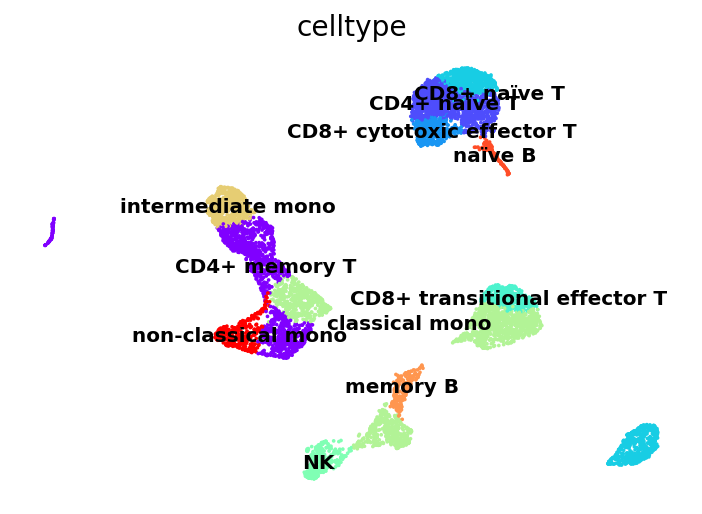

In [37]:
mu.pl.umap(mdata, color="celltype", legend_loc="on data", frameon=False)

# Visualising markers


In [38]:
mdata['rna'].obs['celltype_joint'] = mdata.obs.celltype
mdata['atac'].obs['celltype_joint'] = mdata.obs.celltype

In [39]:
marker_genes = [
    'IL7R', 'TRAC', 'GATA3',                                # CD4+ T
    'LEF1', 'FHIT', 'RORA', 'ITGB1',                        # naïve/memory
    'CD8A', 'CD8B', 'CD248', 'CCL5',                        # CD8+ T
    'GZMH', 'GZMK',                                         # cytotoxic/transitional effector T cells
    'KLRB1', 'SLC4A10',                                     # MAIT
    'IL32',                                                 # T/NK
    'GNLY', 'NKG7',                                         # NK
    'CD79A', 'MS4A1', 'IGHD', 'IGHM', 'IL4R', 'TNFRSF13C',  # B
    'KLF4', 'LYZ', 'S100A8', 'ITGAM', 'CD14',               # mono
    'DPYD', 'ITGAM',                                        # classical/intermediate/non-classical mono
    'FCGR3A', 'MS4A7', 'CST3',                              # non-classical mono
    'CLEC10A', 'IRF8', 'TCF4'                               # DC
]

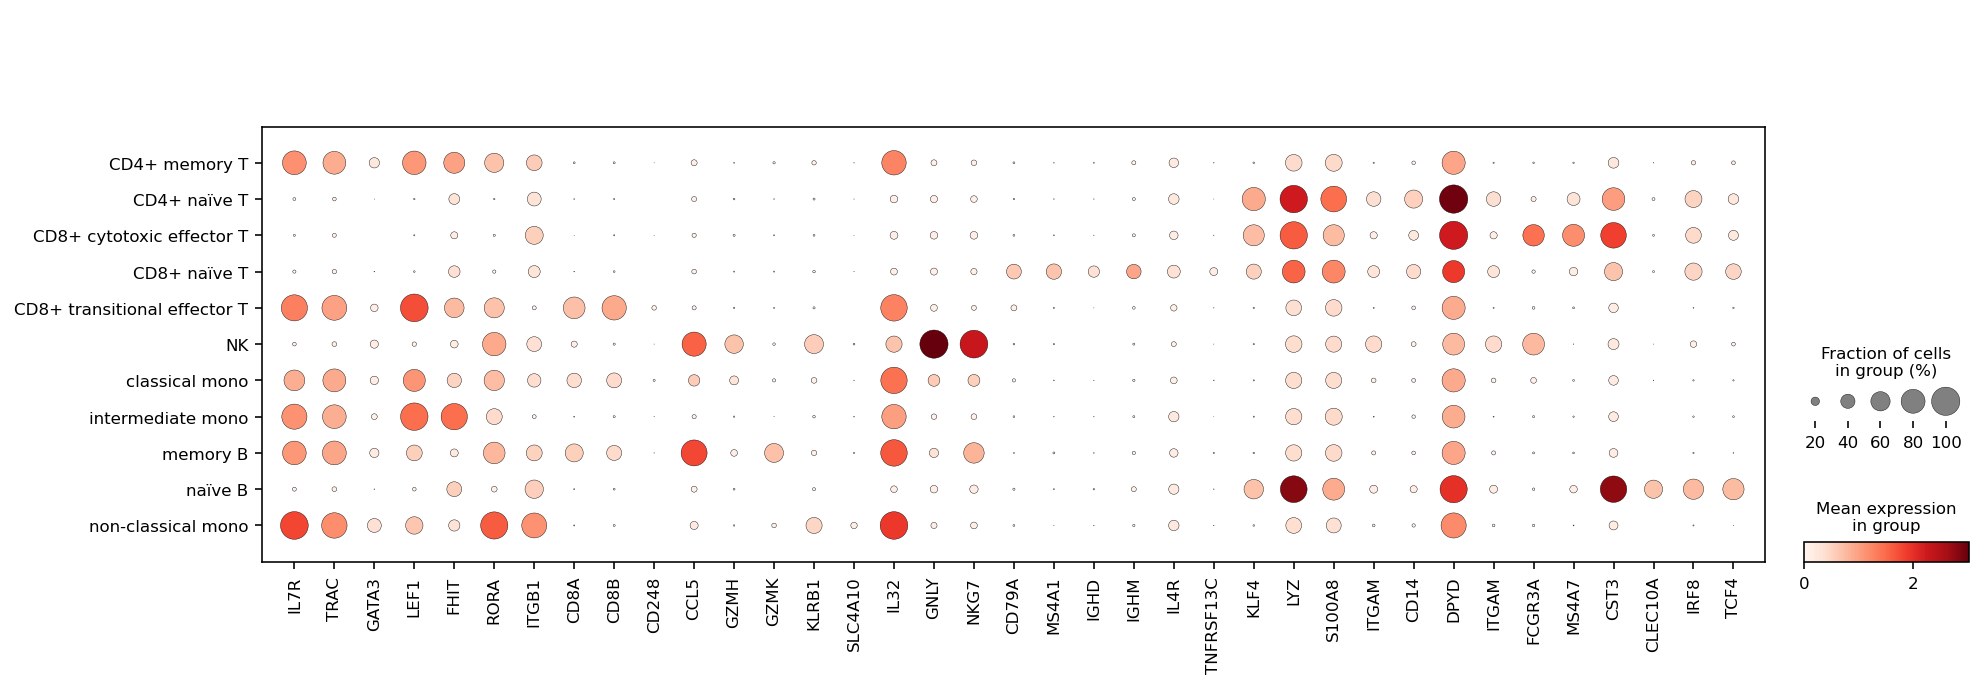

In [40]:
sc.pl.dotplot(mdata['rna'], marker_genes, 'celltype_joint')

In [41]:
marker_peaks = [
    'chr14:99255246-99275454', 'chr10:33135632-33141841',                              # T/NK
    'chr1:1210271-1220028',                                                            # memory T/NK
    'chr2:86783559-86792275',                                                          # CD8+ T/NK
    'chr12:10552886-10555668',                                                         # naïve CD8+ T
    'chr11:114072228-114076352',                                                       # MAIT/NK
    'chr5:150385442-150415310',                                                        # B and mono (CD74)
    'chr22:41931503-41942227', 'chr22:41917087-41929835', 'chr6:167111604-167115345',  # B
    'chr9:107480158-107492721', 'chr5:1476663-1483241',                                # mono
    'chr10:75399596-75404660', 'chr1:220876295-220883526',                             # mDC
    'chr17:81425658-81431769', 'chr7:98641522-98642532',                               # pDC
]

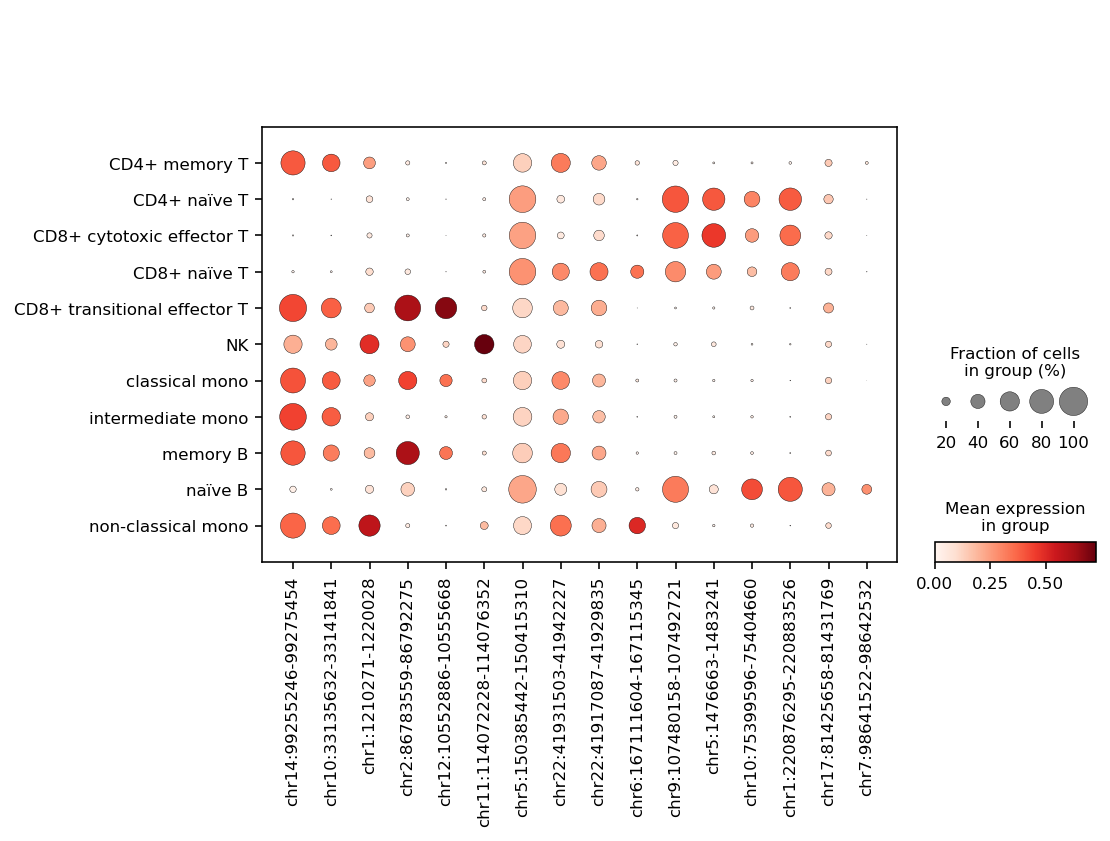

In [42]:
sc.pl.dotplot(mdata['atac'], marker_peaks, 'celltype_joint')

# Saving

In [ ]:
mdata.write("pbmc10k.h5mu")